In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 경로 설정
dataset_path = './train_png_GM45'  # 데이터셋 폴더 경로
excel_path = './Dataset.xlsx'  # 엑셀 파일 경로

In [3]:
# 하이퍼파라미터 설정
image_size = (256, 256)  # 이미지 크기
batch_size = 16
epochs = 20

In [4]:
# 데이터셋 불러오기
dataset = pd.read_excel(excel_path)

image_files = [file for file in os.listdir(dataset_path) if file.endswith('.png')]

In [5]:
# 데이터셋 분할
X_train_files, X_test_files, y_train, y_test = train_test_split(
    image_files, dataset['Age'], test_size=0.2, random_state=42)

In [6]:
# 이미지 전처리 함수 정의
def preprocess_image(image_path):
    image = tf.io.read_file(os.path.join(dataset_path, image_path))
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.resize(image, image_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


In [7]:
# 데이터셋 생성 함수 정의
def create_dataset(X_files, y_values):
    images = [preprocess_image(file) for file in X_files]
    images = tf.stack(images)
    labels = np.array(y_values)
    return images, labels


In [8]:
# 훈련 및 테스트 데이터셋 생성
X_train, y_train = create_dataset(X_train_files, y_train)
X_test, y_test = create_dataset(X_test_files, y_test)

In [9]:
len(X_train)

96

In [10]:
# CNN 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

In [12]:
# 모델 훈련
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
6/6 [==============================] - 3s 57ms/step - loss: 2106.7485 - val_loss: 462.8690
Epoch 2/20
6/6 [==============================] - 0s 25ms/step - loss: 947.5989 - val_loss: 476.4075
Epoch 3/20
6/6 [==============================] - 0s 23ms/step - loss: 668.6819 - val_loss: 490.8127
Epoch 4/20
6/6 [==============================] - 0s 27ms/step - loss: 576.9841 - val_loss: 404.1787
Epoch 5/20
6/6 [==============================] - 0s 28ms/step - loss: 519.7093 - val_loss: 456.8243
Epoch 6/20
6/6 [==============================] - 0s 25ms/step - loss: 490.4240 - val_loss: 332.5450
Epoch 7/20
6/6 [==============================] - 0s 28ms/step - loss: 424.8172 - val_loss: 266.0990
Epoch 8/20
6/6 [==============================] - 0s 25ms/step - loss: 312.6102 - val_loss: 187.2485
Epoch 9/20
6/6 [==============================] - 0s 24ms/step - loss: 237.2885 - val_loss: 108.1599
Epoch 10/20
6/6 [==============================] - 0s 25ms/step - loss: 178.4449 - val_los

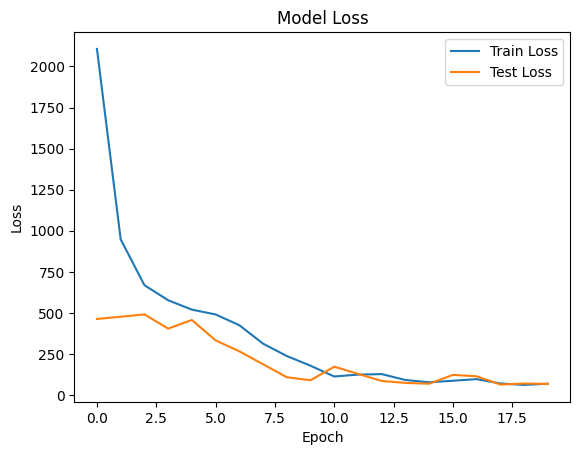

In [13]:
# Train loss와 Test loss 그래프 출력
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# 예측 결과 확인
y_pred = model.predict(X_test)

In [15]:
# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 6.8661744594573975


## cross_valdiation -> 실패, 수정 해야 함

In [17]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [18]:
# 데이터셋 경로 설정
dataset_path = './train_png_GM45'  # 데이터셋 폴더 경로
excel_path = './Dataset.xlsx'  # 엑셀 파일 경로

In [19]:
# 하이퍼파라미터 설정
image_size = (256, 256)  # 이미지 크기
batch_size = 16
epochs = 20

In [20]:
# 데이터셋 불러오기
dataset = pd.read_excel(excel_path)

image_files = [file for file in os.listdir(dataset_path) if file.endswith('.png')]

In [21]:
# 데이터셋 분할
X_train_files, X_test_files, y_train, y_test = train_test_split(
    image_files, dataset['Age'], test_size=0.2, random_state=42)

In [22]:
# 이미지 전처리 함수 정의
def preprocess_image(image_path):
    image = tf.io.read_file(os.path.join(dataset_path, image_path))
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.resize(image, image_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

In [23]:
# 데이터셋 생성 함수 정의
def create_dataset(X_files, y_values):
    images = [preprocess_image(file) for file in X_files]
    images = tf.stack(images)
    labels = np.array(y_values)
    return images, labels

In [24]:
# 훈련 및 테스트 데이터셋 생성
X_train, y_train = create_dataset(X_train_files, y_train)
X_test, y_test = create_dataset(X_test_files, y_test)

In [25]:
len(X_train)

96

In [26]:
# 5-fold cross validation 수행
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
mae_scores = []

In [31]:
X = np.array(X_train)
y = np.array(y_train)

Training on Fold: 6
Epoch 1/20
4/4 [==============================] - 1s 25ms/step - loss: 2352.6316
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 837.7738
Epoch 3/20
4/4 [==============================] - 0s 22ms/step - loss: 951.7322
Epoch 4/20
4/4 [==============================] - 0s 21ms/step - loss: 654.5870
Epoch 5/20
4/4 [==============================] - 0s 20ms/step - loss: 613.6502
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 584.7654
Epoch 7/20
4/4 [==============================] - 0s 22ms/step - loss: 517.7946
Epoch 8/20
4/4 [==============================] - 0s 22ms/step - loss: 546.3530
Epoch 9/20
4/4 [==============================] - 0s 23ms/step - loss: 528.3933
Epoch 10/20
4/4 [==============================] - 0s 22ms/step - loss: 518.5944
Epoch 11/20
4/4 [==============================] - 0s 21ms/step - loss: 515.3484
Epoch 12/20
4/4 [==============================] - 0s 20ms/step - loss: 494.8630
Epoch 13/20
4/4 

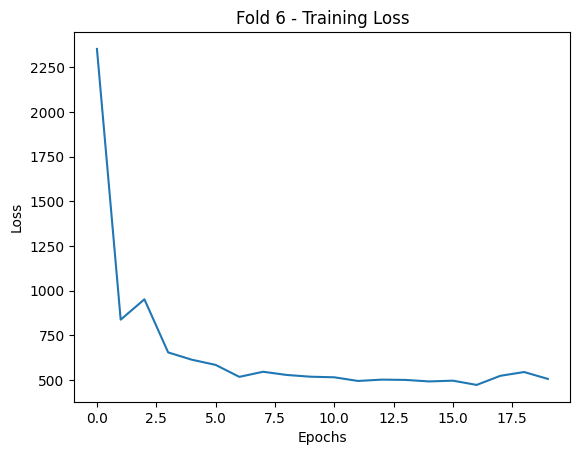

Fold 6 - MAE: 17.323521554470062
Training on Fold: 7


IndexError: index 61 is out of bounds for axis 0 with size 61

In [33]:
for train_index, test_index in kfold.split(X_train):
    print(f"Training on Fold: {fold}")

    X_train, X_test = X_train[train_index], X_train[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # CNN 모델 정의
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='mse')  # 손실 함수는 MSE를 사용

    # 모델 훈련
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
    
    # 훈련 과정의 손실 그래프 그리기
    plt.plot(history.history['loss'])
    plt.title(f"Fold {fold} - Training Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # 테스트 데이터로 예측 수행
    y_pred = model.predict(X_test)

    # MAE 계산 및 결과 출력
    mae = np.mean(np.abs(y_test - y_pred))
    mae_scores.append(mae)
    print(f"Fold {fold} - MAE: {mae}")

    fold += 1

# 5-fold cross validation 결과 출력
print("5-fold Cross Validation - Mean MAE:", np.mean(mae_scores))

In [ ]:
# CNN 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

In [ ]:
# 모델 훈련
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

In [ ]:
# Train loss와 Test loss 그래프 출력
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 예측 결과 확인
y_pred = model.predict(X_test)

In [ ]:
# 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)